# Comparison with APL library on OpenML benchmark datasets

In this notebook we will compare our library with official SAP HANA Automated Predictive Library (details here: https://help.sap.com/viewer/cb31bd99d09747089754a0ba75067ed2/2.5.0.0/en-US). In most cases, our library beats it in accuracy. However, there is always room for improvement. 

In [1]:
from hana_automl.utils.perfomance import Benchmark
from hana_automl.utils.connection import connection_context
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b = Benchmark(connection_context)
apl_acc = []
hana_acc = []
datasets = ['kr-vs-kp.csv', 'australian.csv', 'phoneme.csv']
df = pd.DataFrame()

def plot_results(task: str, boosting: bool):
    df['APL'] = apl_acc
    df['HANA AutoML'] = hana_acc
    df['Dataset'] = datasets
    x = np.arange(len(datasets))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, apl_acc, width, label='APL')
    rects2 = ax.bar(x + width/2, hana_acc, width, label='HANA AutoML')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    if boosting:
        ax.set_title(f'{task} (APL with Gradient Boosting)')
    else:
        ax.set_title(f'{task} (APL without Gradient Boosting)')
    
    ax.set_xticks(x)
    ax.set_xticklabels(datasets)
    ax.legend()

    ax.bar_label(rects1)
    ax.bar_label(rects2)

    plt.gcf().set_size_inches(10,5)
    plt.show()

## Just APL, without Gradient Boosting enabled:
Don't know what is Gradient Boosting? Check here: https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/ . We are using special benchmark datasets from OpenML to compare model accuracy.

## Classification

In [ ]:
# https://www.openml.org/d/3
b.run('./data/benchmark/cls/kr-vs-kp.csv', task='cls', label='class', categorical=['class'], grad_boost=False)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

# https://www.openml.org/d/40981
b.run('./data/benchmark/cls/australian.csv', task='cls', 
      label='A15', 
      categorical=['A15', 'A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12'],
      grad_boost=False)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

# https://www.openml.org/d/1489
b.run('./data/benchmark/cls/phoneme.csv', task='cls', label='Class', categorical=['Class'], grad_boost=False)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

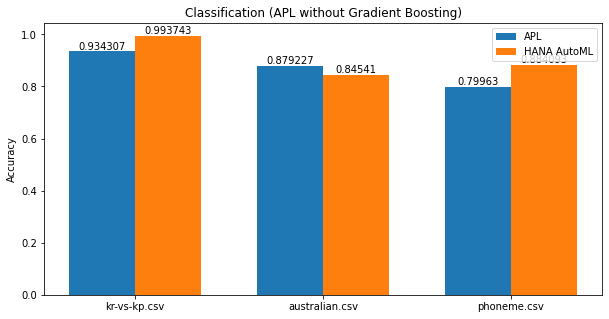

In [118]:
plot_results(task='Classification', boosting=False)

## Regression

In [10]:
datasets = ['elevators.csv', 'wine_quality.csv', 'baseball.csv']
hana_acc = []
apl_acc = []

In [ ]:
# https://www.openml.org/d/216
b.run('./data/benchmark/reg/elevators.csv', task='reg', label='Goal', grad_boost=False)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

In [ ]:
# https://www.openml.org/d/287
b.run('./data/benchmark/reg/wine_quality.csv', task='reg', label='quality', grad_boost=False)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

In [ ]:
# https://www.openml.org/d/41021
b.run('./data/benchmark/reg/baseball.csv', task='reg', label='RS', grad_boost=False)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

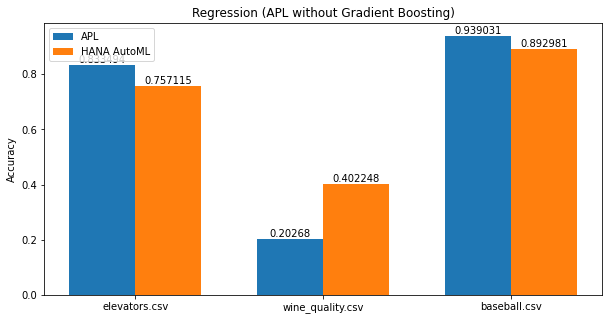

In [14]:
plot_results(task='Regression', boosting=False)

## Gradient boosting enabled

## Classification

In [19]:
datasets = ['kr-vs-kp.csv', 'australian.csv', 'phoneme.csv']
hana_acc = []
apl_acc = []

In [ ]:
# https://www.openml.org/d/3
b.run('./data/benchmark/cls/kr-vs-kp.csv', task='cls', label='class', categorical=['class'], grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

In [ ]:
# https://www.openml.org/d/40981
b.run('./data/benchmark/cls/australian.csv', task='cls', 
      label='A15', 
      categorical=['A15', 'A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12'],
      grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

In [ ]:
# https://www.openml.org/d/1489
b.run('./data/benchmark/cls/phoneme.csv', task='cls', label='Class', categorical=['Class'], grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

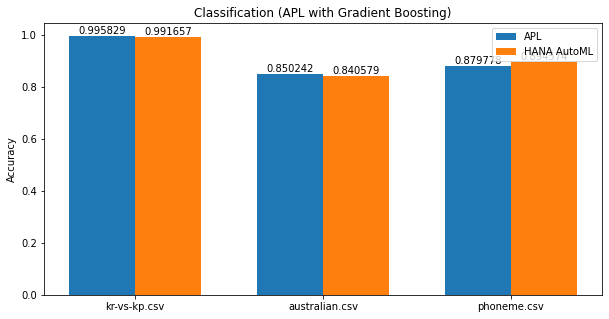

In [23]:
plot_results(task='Classification', boosting=True)

## Regression

In [24]:
datasets = ['elevators.csv', 'wine_quality.csv', 'baseball.csv']
hana_acc = []
apl_acc = []

In [ ]:
# https://www.openml.org/d/216
b.run('./data/benchmark/reg/elevators.csv', task='reg', label='Goal', grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

In [ ]:
# https://www.openml.org/d/287
b.run('./data/benchmark/reg/wine_quality.csv', task='reg', label='quality', grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

In [ ]:
# https://www.openml.org/d/41021
b.run('./data/benchmark/reg/baseball.csv', task='reg', label='RS', grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

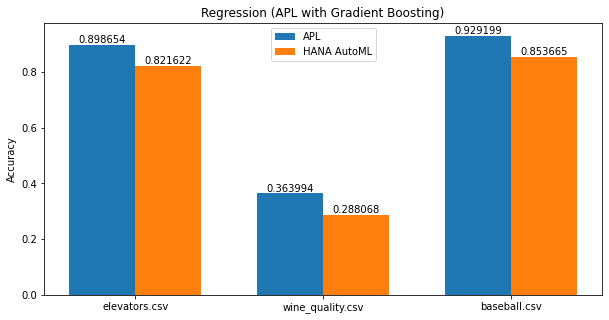

In [29]:
plot_results(task='Regression', boosting=True)